# Lab 4 - Final Pipeline for ASL Data Classification

This is a project group assignment.

**Due: Friday, April 10, 11:59 PM**

## Grading Rubric

1. **Problem 1 (10 pts):** you have included a screenshot of your Zoom meeting/s.
    
2. **Problem 2 (90 pts):** you have finalized your end-to-end machine learning pipeline, have included a set of experiments to evaluate the performance of your model and included a discussion of your results.

**Total: 100 pts**

In [1]:
# Create custom dataset. Idea supplied by Mat Cook

from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import collections
import numpy as np
from skimage.color import rgb2gray

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms


In [3]:
numpy_data = np.load('train_data.npy')
numpy_target = np.load('train_labels.npy')

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(numpy_target)
target = le.transform(numpy_target)
target  = target + 1

In [5]:
# Creat Custom dataset. Idea supplied by Dr. Silva
class MyDataset(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = torch.from_numpy(data).float()
        self.target = torch.from_numpy(target).long()
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        
        if self.transform:
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

In [6]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [7]:
dataset = MyDataset(numpy_data, target)
loader = DataLoader(
    dataset,
    batch_size=64,
    shuffle=True,
    num_workers=2,
    pin_memory=torch.cuda.is_available()
)

In [8]:
for batch_idx, (data, target) in enumerate(loader):
    print('Batch idx {}, data shape {}, target shape {}'.format(
        batch_idx, data.shape, target.shape))

RuntimeError: DataLoader worker (pid(s) 10932, 1276) exited unexpectedly

In [ ]:
# # Vectorize origional data so other preprocessing techniques can be used. 
# Xtrain2 = []
# for k in range(len(Xtrain)):   
#         X_train1 = rgb2gray(Xtrain[k,:,:,:])
#         Xtrain2 += [X_train1.ravel()]
# Xtrain2 = np.array(Xtrain2)

# Xtrain2.shape, Xtrain.shape, len(Xtrain)

In [9]:
from sklearn.model_selection import train_test_split

X_train_norm = Xtrain/255

X_train, X_test, y_train, y_test = train_test_split(X_train_norm, ytrain, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: name 'Xtrain' is not defined

In [10]:
transp = X_train.transpose(0,3,2,1)
x_train = torch.tensor(transp)
transp_test = X_test.transpose(0,3,2,1)
x_test = torch.tensor(transp_test)

x_train.shape, x_test.shape

NameError: name 'X_train' is not defined

In [ ]:
# # Loading MNIST data set
# image_size = 28 # width and length
# no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
# image_pixels = image_size * image_size

# # Loading Training Samples
# train_data = np.loadtxt("sign_mnist_train.csv", delimiter=",")
# X_train = train_data[:,1:]
# y_train = train_data[:,0]

# # Loading Test Samples
# test_data = np.loadtxt("sign_mnist_test.csv", delimiter=",") 
# X_test = test_data[:,1:]
# y_test = test_data[:,0]

# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import learning_curve
# from sklearn.model_selection import ShuffleSplit


In [ ]:
# # Analysis of batch sizes 
# train_sizes, train_scores, test_scores = learning_curve(MLPClassifier(activation='logistic', batch_size=1400, learning_rate_init=0.001, momentum=0, random_state=0,nesterovs_momentum=False, hidden_layer_sizes=(10)), Xtrain2, ytrain,cv=10, scoring='accuracy', n_jobs=-1)
    
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std  = np.std(train_scores, axis=1)
# test_scores_mean  = np.mean(test_scores, axis=1)
# test_scores_std   = np.std(test_scores, axis=1)
    
# plt.plot(train_sizes, train_scores_mean)
# plt.legend()
    
# plt.title('Learning Curve')
# plt.xlabel('Training Size') 
# plt.ylabel('Score');

In [11]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [12]:
import torchvision

In [13]:
# FROM THIS POINT ONWARD IS AN EXAMPLE I FOUND ONLINE

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [14]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [15]:
example_data.shape

torch.Size([1000, 1, 28, 28])

NameError: name 'x_test' is not defined

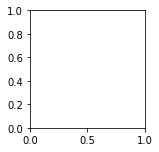

In [16]:

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(x_test[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(y_test[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [18]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [19]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [20]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
#             torch.save(network.state_dict(),'\results\model.pth')
#             torch.save(optimizer.state_dict(),'\results\optimizer.pth')

In [21]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [22]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()


Test set: Avg. loss: 2.3004, Accuracy: 751/10000 (8%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.268457
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.268337
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.274000
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.251669
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.236826
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.223578
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.153432
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.096480
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.974480
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.944769
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.839859
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.767560
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.698696
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.683217
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.504576
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.390304
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.288033
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.330191
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.279855
Train Epoch: 1 [12160/6

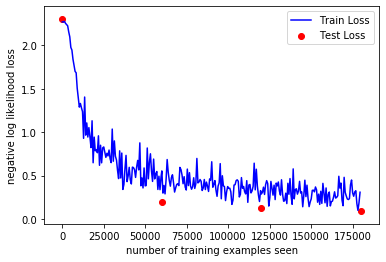

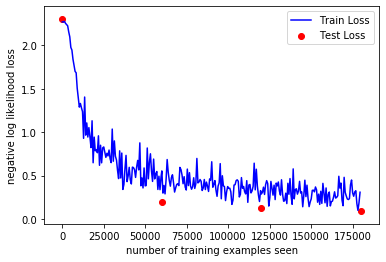

In [23]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [ ]:
np.shape(test_counter), np.shape(test_losses)

In [ ]:
fig = plt.figure(figsize=(5,4))
for i in range(10):
    ax = fig.add_subplot(4,3,i+1)
    ax.imshow(X_train[np.where(y_train==i)[0][1],:].reshape((28,28)), cmap='binary')

# End-to-End Pipeline for ASL Data Classification

The objective of Lab 4 is to finalize your choice of pre-processing pipeline and classifier selection, provide discussion and motivation for the chosen approach based on outcomes from Labs 1-3.

**You can use ```scikit-learn``` or ```PyTorch``` libraries.**

**Objectives**

By completing this assignment you will practice and master the following skills:

* Experimental design
* Setup of an end-to-end approach using supervised learning techniques
* Library function' implementation and parameter tuning

**Create your Repo**

You can create the repo for this assignment by visiting the following link: https://classroom.github.com/g/hC0gy-1A

# Training Data Set

The training data set was collected from the entire class of EEL 4930. The training set contains 1844 samples of $100\times 100$ RGB images. 
* You can download both the training data set (**"train_data.npy"**) and training labels (**"train_labels.npy"**) from our Canvas page [here](https://ufl.instructure.com/courses/395133/files/folder/Project%20Data).

# Problem 1 Description

As we have moved to a virtual environment communication, I am recommending that each team meet via Zoom.

You can schedule meetings that best work for your team here: https://ufl.zoom.us/

* Attach a screenshot proof that you have created a meeting and attended the meeting via Zoom.

* To facilitate collaborative coding while you are communicating via Zoom, I recommend that you use [Google Colab](https://colab.research.google.com/). 
    * You can edit all your Jupter Notebooks in this platform. The updates are live so your teammates can view and participate in real time.

# Problem 2 Description

In this lab you will finalize your end-to-end machine learning pipeline whichs includes pre-processing, classification and evaluation of the results for the ASL data set. The choice of your final approach will be based on outcomes from Lasb 1-3.

Include a new section of experiments for the classification you choose. Your experiments should include all the standard steps of a machine learning algorithm or deep learning architecture.

Provide a discussion for each step of your pipeline. This approach should be the one used to carry out experimental design on your final project code and report.

## Submit your Solution

Along with your Jupyter Notebook answers, create a PDF of the notebook with your solutions.

As always, `add` and `commit` the final version of your work, and `push` your code to your GitHub repository.

* Submit the **URL** of your GitHub Repository as your assignment submission on Canvas (only one team member needs to do so).

Using pooling to reduce parameter space 
Can adjust stride value to jump 2,3,4, etc... typically want to maintain overlapping regions 
more popular to use stride for pooling layers
input convoluitonal layer
pooling layer
conv layer
pooling layer
etc

max pooling is most popular (disadvantage include throwing away data)
average pooling ( prone to overfitting. more seceptable to noise)